Goals: \
    1. Plot neurons on MEA map \
    2. STTC for timing cohorence \
    3. Manualy plot feature view

# Import APIs

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import json
import h5py
import csv
import pandas as pd
# from pylab import *

import braingeneers.utils.s3wrangler as wr
import braingeneers.utils.smart_open_braingeneers as smart_open

# from circus.shared.parser import CircusParser
# from circus.shared.files import load_data

# Read Kilosort result

## Read good channels from curation

In [3]:
folder_name = 'Trace_Kilosort_20220518_chip11350.raw/Trace_Kilosort_20220518_chip11350.raw.GUI/'

In [3]:
tsv_file = folder_name + 'cluster_info.tsv'
cluster_info = pd.read_csv(tsv_file, sep = '\t')
cluster_ids = list(cluster_info['cluster_id'])
channels = list(cluster_info['ch'])
groups = list(list(cluster_info['group']))

cluster_chn = [(i, j, k) for i, j, k in zip(cluster_ids, channels, groups)]
print(len(cluster_chn))
print(cluster_chn[0:10])

86
[(0, 12, 'good'), (1, 17, 'good'), (2, 31, 'good'), (3, 58, 'good'), (4, 93, 'good'), (5, 114, 'good'), (6, 134, nan), (8, 134, 'good'), (9, 145, 'good'), (10, 199, nan)]


In [4]:
# extract the good units that are labled during curation
clusters_good = {}    # {id: channel}
for cluster in cluster_chn:
    if cluster[2] == 'good':
        clusters_good[cluster[0]] = cluster[1]
print(clusters_good, len(clusters_good))

{0: 12, 1: 17, 2: 31, 3: 58, 4: 93, 5: 114, 8: 134, 9: 145, 12: 213, 13: 415, 14: 233, 15: 237, 16: 254, 17: 256, 18: 298, 19: 284, 20: 331, 21: 26, 22: 369, 26: 394, 27: 438, 28: 271, 30: 474, 31: 485, 33: 521, 34: 389, 35: 559, 36: 573, 38: 595, 39: 598, 42: 371, 43: 939, 44: 630, 45: 631, 47: 643, 48: 668, 49: 752, 50: 577, 51: 613, 52: 691, 53: 696, 54: 700, 55: 705, 56: 806, 57: 723, 58: 733, 59: 754, 60: 755, 62: 815, 63: 924, 64: 840, 65: 877, 66: 642, 67: 908, 68: 917, 70: 801, 71: 867, 72: 961, 74: 415, 75: 489, 76: 851, 77: 640, 78: 754, 83: 908, 84: 540, 85: 540} 66


In [5]:
print(clusters_good.keys(), len(clusters_good.keys()))

dict_keys([0, 1, 2, 3, 4, 5, 8, 9, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 26, 27, 28, 30, 31, 33, 34, 35, 36, 38, 39, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 62, 63, 64, 65, 66, 67, 68, 70, 71, 72, 74, 75, 76, 77, 78, 83, 84, 85]) 66


## Spike times for good channels

In [6]:
spike_clusters = list(np.load(folder_name + 'spike_clusters.npy'))
print(len(spike_clusters), spike_clusters[0:100])
print(min(spike_clusters), max(spike_clusters))

72276 [56, 69, 65, 66, 22, 22, 37, 40, 48, 48, 26, 75, 3, 75, 38, 76, 12, 14, 37, 37, 38, 76, 12, 83, 37, 38, 76, 12, 14, 16, 37, 37, 83, 37, 19, 48, 48, 77, 37, 46, 40, 56, 37, 4, 40, 54, 28, 18, 18, 37, 13, 28, 52, 13, 13, 40, 24, 17, 75, 37, 75, 17, 75, 19, 42, 71, 35, 45, 75, 17, 19, 22, 72, 22, 64, 23, 56, 3, 37, 24, 24, 24, 24, 24, 40, 40, 72, 83, 83, 59, 64, 23, 68, 56, 68, 69, 65, 66, 4, 40]
0 86


In [7]:
fs = 20
spike_times_all = (np.load(folder_name + 'spike_times.npy') / fs).tolist()
spike_times_phy = []
for i in spike_times_all:
    spike_times_phy += i
print(len(spike_times_phy), spike_times_phy[0:100])

72276 [25.2, 35.3, 36.2, 36.3, 39.85, 68.3, 75.8, 93.4, 139.3, 216.1, 227.65, 265.25, 277.4, 293.25, 313.95, 314.1, 314.95, 317.6, 332.9, 341.75, 344.55, 344.65, 345.45, 357.95, 374.25, 375.75, 375.85, 376.7, 379.45, 381.3, 381.35, 391.55, 392.2, 416.9, 452.85, 478.7, 495.9, 511.35, 543.35, 570.2, 587.5, 608.9, 620.85, 654.1, 660.4, 726.25, 741.45, 752.4, 772.65, 779.9, 789.6, 799.6, 804.75, 826.95, 860.05, 882.4, 915.2, 935.3, 940.15, 940.15, 963.1, 970.1, 981.2, 996.2, 996.55, 996.7, 997.85, 1000.7, 1015.5, 1018.85, 1079.2, 1143.1, 1169.6, 1171.75, 1195.0, 1198.45, 1219.1, 1224.9, 1253.8, 1263.7, 1294.6, 1302.2, 1315.65, 1335.55, 1340.45, 1345.6, 1349.9, 1357.1, 1374.4, 1374.6, 1375.05, 1378.55, 1439.45, 1445.2, 1467.8, 1469.35, 1470.25, 1470.35, 1493.45, 1496.75]


In [8]:
clusters_good_set = set(list(clusters_good.keys()))
# print(clusters_good_set)
spike_times_good = dict([(key, []) for key in list(clusters_good.keys())])
for i in range(len(spike_clusters)):
    if spike_clusters[i] in clusters_good_set:
#         print(spike_clusters[i])
        spike_times_good[spike_clusters[i]].append(spike_times_phy[i])    # spike_times_good = {cluster: spike_times}

print(len(spike_times_good))

66


In [9]:
spike_times = list(spike_times_good.values())
print(len(spike_times))
print(spike_times_good.keys())
print(len(spike_times[1]))

66
dict_keys([0, 1, 2, 3, 4, 5, 8, 9, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 26, 27, 28, 30, 31, 33, 34, 35, 36, 38, 39, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 62, 63, 64, 65, 66, 67, 68, 70, 71, 72, 74, 75, 76, 77, 78, 83, 84, 85])
803


## STTC for good neurons

### STTC source code

In [10]:
# Calculate sttc for al neurons
# TA, TB -- the proportion of total recording time which lies within +- delta_t of any spike from A or B.
# PA, PB -- the proportion of spikes from A or B which lie within +- delta_t of any spike from A or B.

# The following functions are copied from Braingeneerspy/analysis.py
# No need to rewrite them since they are optimized. 
def _sttc_ta(tA, delt, tmax):
    '''
    Helper function for spike time tiling coefficients: calculate the
    total amount of time within a range delt of spikes within the
    given sorted list of spike times tA.
    '''
    if len(tA) == 0:
        return 0

    base = min(delt, tA[0]) + min(delt, tmax - tA[-1])
    return base + np.minimum(np.diff(tA), 2*delt).sum()

def _sttc_na(tA, tB, delt):
    '''
    Helper function for spike time tiling coefficients: given two
    sorted lists of spike times, calculate the number of spikes in
    spike train A within delt of any spike in spike train B.
    '''
    if len(tB) == 0:
        return 0
    tA, tB = np.asarray(tA), np.asarray(tB)

    # Find the closest spike in B after spikes in A.
    iB = np.searchsorted(tB, tA)

    # Clip to ensure legal indexing, then check the spike at that
    # index and its predecessor to see which is closer.
    np.clip(iB, 1, len(tB)-1, out=iB)
    dt_left = np.abs(tB[iB] - tA)
    dt_right = np.abs(tB[iB-1] - tA)

    # Return how many of those spikes are actually within delt.
    return (np.minimum(dt_left, dt_right) <= delt).sum()

def spike_time_tilings(neuron_spike_times, delt=50):                       # neuron_spike_times - spike times of all the neurons of interest
        '''
        Compute the full spike time tiling coefficient matrix.
        '''
        length = max((t[-1] for t in neuron_spike_times if len(t) > 0))
        ret = np.diag(np.ones(len(neuron_spike_times)))
        for i in range(len(neuron_spike_times)):
            for j in range(i+1, len(neuron_spike_times)):
                ret[i,j] = ret[j,i] = spike_time_tiling(neuron_spike_times[i], neuron_spike_times[j], delt, length)
        return ret

def spike_time_tiling(tA, tB, delt, length):
    '''
    Given the indices of two units of interest, compute the spike
    time tiling coefficient [1], a metric for causal relationships
    between spike trains with some improved intuitive properties
    compared to the Pearson correlation coefficient.
    [1] Cutts & Eglen. Detecting pairwise correlations in spike
        trains: An objective comparison of methods and application
        to the study of retinal waves. J Neurosci 34:43,
        14288–14303 (2014).
    '''
#     tA, tB = neuron_spike_times[i], neuron_spike_times[j]

    TA = _sttc_ta(tA, delt, length) / length
    TB = _sttc_ta(tB, delt, length) / length

    PA = _sttc_na(tA, tB, delt) / len(tA) if len(tA) > 0 else 1.0
    PB = _sttc_na(tB, tA, delt) / len(tB) if len(tB) > 0 else 1.0

    aa = (PA-TB)/(1-PA*TB) if PA*TB != 1 else 0
    bb = (PB-TA)/(1-PB*TA) if PB*TA != 1 else 0
    return (aa + bb) / 2

### Spike Time Tiling Coefficient

Get spike time tilings

In [11]:
tilings = spike_time_tilings(spike_times)

Surys code

In [12]:
## tilings = spike_time_tilings(spike_times)
print(tilings.shape)
print(tilings.min(), tilings.max())
second_max = 0
for i in range(tilings.shape[0]):
    for j in range(tilings.shape[1]):
        if tilings[i][j] > 0.35:
#             second_max = max(second_max, tilings[i][j])
            print(i, j, tilings[i][j])
print(second_max)

(66, 66)
-0.03898305830259269 1.0
0 0 1.0
0 22 0.9459177439401361
1 1 1.0
1 34 0.9971133540270181
1 47 1.0
2 2 1.0
2 16 0.916916769693398
3 3 1.0
4 4 1.0
5 5 1.0
6 6 1.0
7 7 1.0
8 8 1.0
8 10 0.8647160424107738
8 28 0.955338276999026
8 60 0.953858807808352
9 9 1.0
10 8 0.8647160424107738
10 10 1.0
10 28 0.9100036594636496
10 60 0.9098121800637058
11 11 1.0
11 20 1.0
12 12 1.0
13 13 1.0
14 14 1.0
15 15 1.0
16 2 0.916916769693398
16 16 1.0
17 17 1.0
18 18 1.0
19 19 1.0
20 11 1.0
20 20 1.0
21 21 1.0
22 0 0.9459177439401361
22 22 1.0
23 23 1.0
24 24 1.0
25 25 1.0
26 26 1.0
26 30 0.9633884879580923
26 33 0.9620647567616769
26 56 0.9639434796200744
27 27 1.0
28 8 0.955338276999026
28 10 0.9100036594636496
28 28 1.0
28 60 0.9985595823641074
29 29 1.0
29 32 0.8443487558013194
30 26 0.9633884879580923
30 30 1.0
30 33 0.9941144521586438
30 56 0.9994601674513963
31 31 1.0
31 44 0.9989287561844207
32 29 0.8443487558013194
32 32 1.0
33 26 0.9620647567616769
33 30 0.9941144521586438
33 33 1.0
33 56 0

<AxesSubplot:>

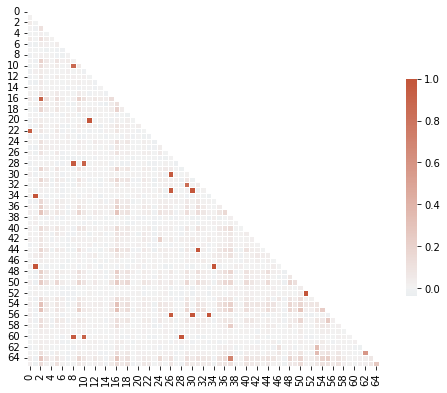

In [13]:
# plot sttc
import seaborn
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(tilings, dtype=bool))
figure, axs = plt.subplots(1, 1, figsize=(8, 8))
# Generate a custom diverging colormap
cmap = seaborn.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
seaborn.heatmap(tilings, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

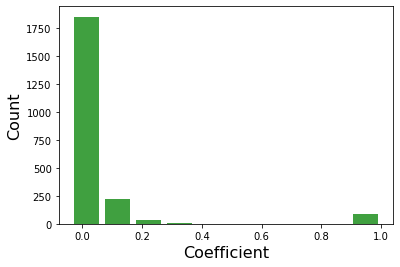

In [14]:
# plot sttc distribution, bin size = 0.1, 10 bins
sttc_list = []
for i in range(len(tilings)):
    sttc_list += list(tilings[i][i:])

fig = plt.figure(figsize=(6, 4))
n, bins, patches = plt.hist(sttc_list, 10, rwidth=0.8, facecolor='g', alpha=0.75)
plt.xlabel('Coefficient', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show()

In [15]:
chn_nums = np.load(folder_name + 'channel_map.npy')
positions = np.load(folder_name + 'channel_positions.npy')
# print(chn_nums)
# print(positions)
chn_map = {}
if len(chn_nums) != len(positions):
    print("Wrong mapping for channels!")
    print(len(chn_nums), len(positions))
    print(chn_nums)
else:
    for i in range(len(chn_nums)):
        chn_map[chn_nums[i][0]] = list(positions[i])
print(len(chn_map))
# print(chn_map)
# to-do: channel map has many kinds of data structures. Need to make the code generic to all kinds.

708


In [16]:
# spike times on electrodes
chn_pos = []
elec_no = []
for i in list(clusters_good.values()):
    chn_pos.append(chn_map[i])
    elec_no.append(i)
print(chn_pos, len(chn_pos))

[[280.0, 1242.5], [3097.5, 805.0], [3780.0, 1137.5], [402.5, 1155.0], [3832.5, 787.5], [612.5, 1732.5], [280.0, 1750.0], [3395.0, 507.5], [3010.0, 822.5], [3150.0, 735.0], [3640.0, 1242.5], [3797.5, 1627.5], [980.0, 1277.5], [367.5, 1802.5], [280.0, 1872.5], [297.5, 1907.5], [3360.0, 455.0], [840.0, 1312.5], [682.5, 1855.0], [280.0, 1802.5], [3745.0, 1645.0], [805.0, 1890.0], [997.5, 1242.5], [3080.0, 1592.5], [3290.0, 770.0], [752.5, 1242.5], [2992.5, 822.5], [2922.5, 910.0], [3202.5, 717.5], [1820.0, 1505.0], [3115.0, 752.5], [3115.0, 735.0], [2012.5, 1312.5], [3237.5, 735.0], [3150.0, 840.0], [927.5, 1925.0], [1067.5, 1890.0], [3150.0, 892.5], [2782.5, 1470.0], [2975.0, 787.5], [840.0, 1942.5], [822.5, 1890.0], [2817.5, 1330.0], [1295.0, 1610.0], [3132.5, 822.5], [2660.0, 1312.5], [2100.0, 1400.0], [3027.5, 787.5], [2940.0, 770.0], [1697.5, 1697.5], [1820.0, 1557.5], [2362.5, 1190.0], [2380.0, 1190.0], [1837.5, 1487.5], [2712.5, 1400.0], [2607.5, 1382.5], [3132.5, 787.5], [1802.5, 1

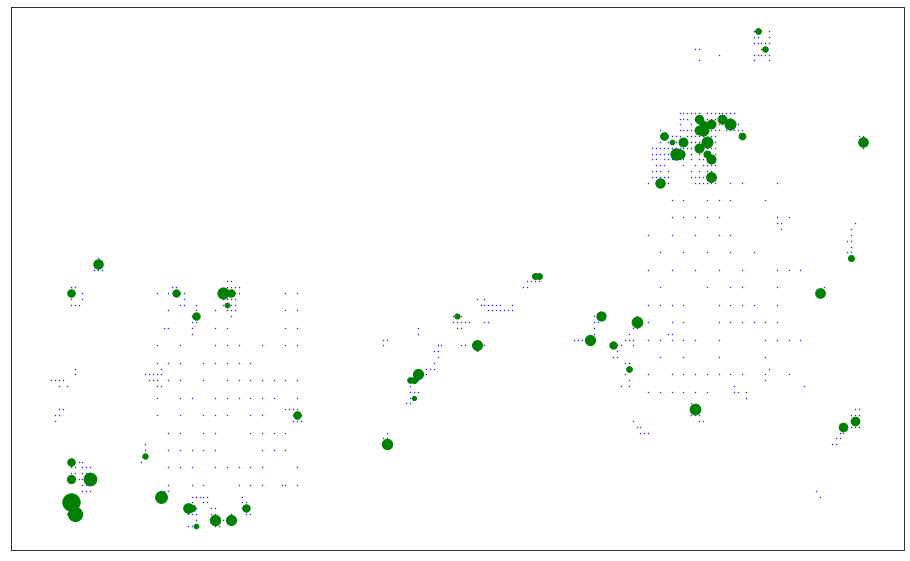

0


In [17]:
# plot spike times on electrodes map with circle size corresponding to the number of spike times
fig, axs = plt.subplots(figsize=(16, 10))
ele_map = np.asarray(list(chn_map.values()))
plt.scatter(ele_map[:,0], ele_map[:,1], s=0.2, color='blue')
n = 0
for i in range(len(spike_times)):
    plt.scatter(chn_pos[i][0], chn_pos[i][1], s=len(spike_times[i])/10, color='green')
#     plt.text(chn_pos[i][0], chn_pos[i][1], str(elec_no[i]), color="blue", fontsize=10)
#     for t in range(i+1, len(tilings[i])):
#         if tilings[i][t] > 0.35:
#             n+=1
#             plt.plot([chn_pos[i][0], chn_pos[t][0]], [chn_pos[i][1], chn_pos[t][1]], linewidth=5*tilings[i][t], color='red', alpha=tilings[i][t]*0.3)
            
axs.xaxis.set_visible(False)
axs.yaxis.set_visible(False)
plt.gca().invert_yaxis()
plt.show()
print(n)

## Raster plot

In [18]:
def plot_raster(chn_pos, spike_times):
    st_left = []
    st_right = []
    left_ind = set()
    for i in range(len(chn_pos)):
        if chn_pos[i][0] <= 2000:
            st_left.append(spike_times[i])
            st_right.append([])
            left_ind.add(i)
    st_right.append([])
    for i in range(len(chn_pos)):
        if i not in left_ind and chn_pos[i][0] > 2000:
            st_right.append(spike_times[i])

    fig, axs = plt.subplots(1, 1, figsize=(24, 8))
    axs.eventplot(st_left, linelengths=1, linewidth=2, color='blue', alpha=0.4)
    axs.eventplot(st_right, linelengths=1, linewidth=2, color='blueviolet', alpha=0.4)
    # axs.set_xlim(122, 125)
    axs.set_xlabel("Time (ms)", fontsize=16)
    axs.set_ylabel("Units",fontsize=16)
    axs.xaxis.set_tick_params(labelsize=18)
    axs.yaxis.set_tick_params(labelsize=18)
    plt.show()

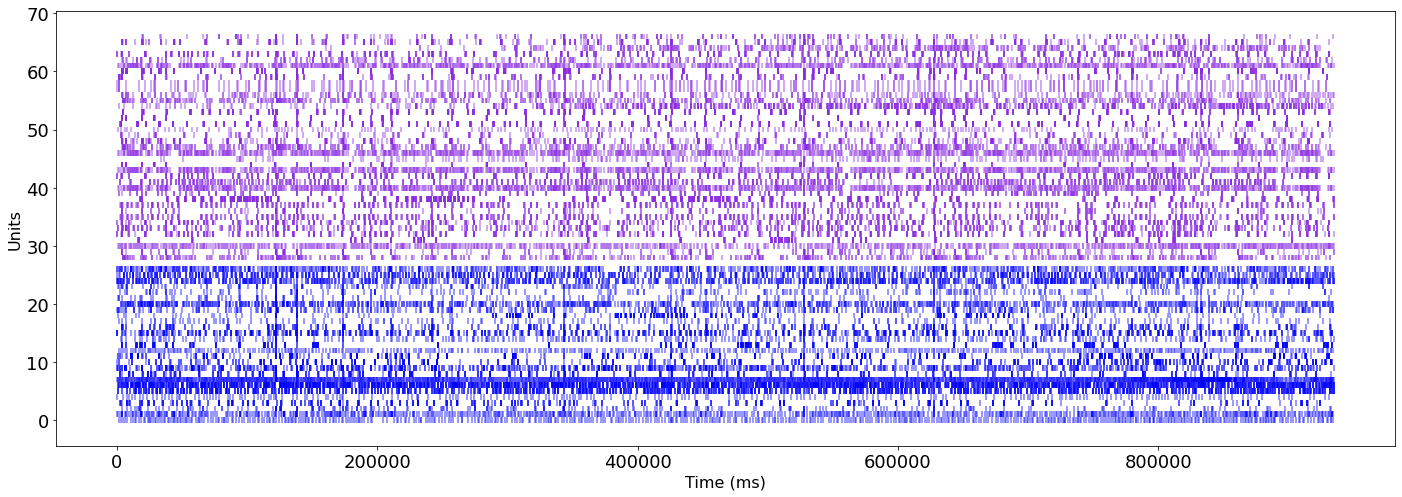

In [19]:
plot_raster(chn_pos, spike_times)

In [20]:
import itertools
def population_rate(bin_size, spike_times):
    if len(spike_times) > 1:
        spike_times_sorted = sorted(list(itertools.chain.from_iterable(spike_times)))
    else:
        spike_times_sorted = spike_times
    bin_max = max(spike_times_sorted)
    bin_num = int(bin_max//bin_size)+1
    bins = np.linspace(0, bin_max, bin_num)
    dens,_ = np.histogram(spike_times_sorted, bins)
    return bins, dens

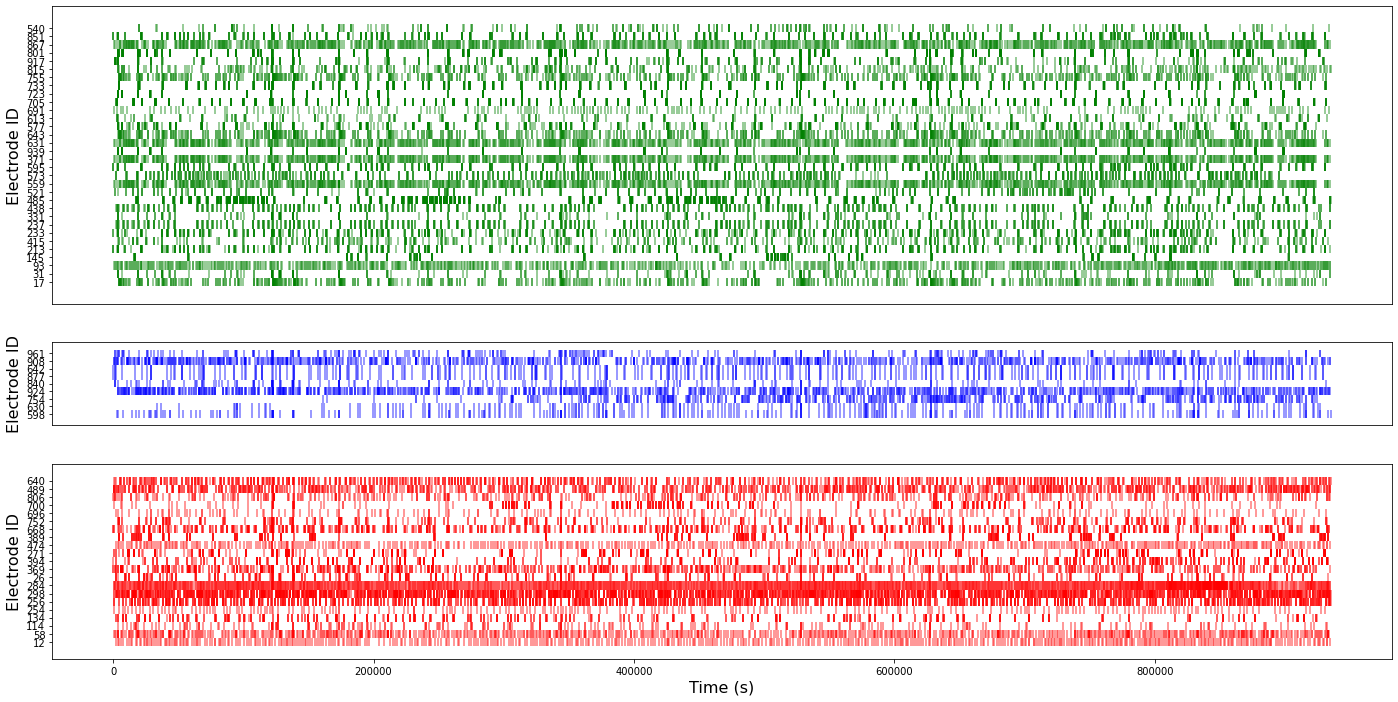

In [21]:
# plot raster for left and right connectoid
# plot three parts: left (0, 1500), middle (1500, 2500), right (2500, 4000)
# Sort raster from bottom to top by sttc for each part, highlight ones with high sttc
# label y-axis with electrode number
import itertools
st_left = {}
st_middle = {}
st_right = {}
for i in range(len(chn_pos)):
    if chn_pos[i][0] < 1500:
        st_left[elec_no[i]] = spike_times[i]
    elif 1500 <= chn_pos[i][0] <= 2500:
        st_middle[elec_no[i]] = spike_times[i]
    elif chn_pos[i][0] > 2500:
        st_right[elec_no[i]] = spike_times[i]

# bin_size = 0.005    # unit is second
bin_size = 5
bins_left, pr_left = population_rate(bin_size, st_left.values())
bins_middle, pr_middle = population_rate(bin_size, st_middle.values())
bins_right, pr_right = population_rate(bin_size, st_right.values())

fig, axs = plt.subplots(3, 1, figsize=(24, 12), gridspec_kw={'height_ratios': [len(st_right), len(st_middle), len(st_left)]})
linelengths, linewidth, alpha = 1, 2, 0.4
axs[2].eventplot(st_left.values(), linelengths=linelengths, linewidth=linewidth, color='red', alpha=alpha)
axs[2].set_yticks(np.arange(len(st_left)))
axs[2].set_yticklabels(st_left.keys())
axs[2].set_ylabel('Electrode ID', fontsize=16)
# ax2 = axs[2].twinx()
# ax2.plot(bins_left[1:], pr_left, color='firebrick', alpha=1)
# plt.xlim(342, 346)

axs[1].eventplot(st_middle.values(), linelengths=linelengths, linewidth=linewidth, color='blue', alpha=alpha)
axs[1].set_yticks(np.arange(len(st_middle)))
axs[1].set_yticklabels(st_middle.keys())
axs[1].xaxis.set_visible(False)
axs[1].set_ylabel('Electrode ID', fontsize=16)
# ax2 = axs[1].twinx()
# ax2.plot(bins_middle[1:], pr_middle, color='firebrick', alpha=1)
# plt.xlim(342, 346)

axs[0].eventplot(st_right.values(), linelengths=linelengths, linewidth=linewidth, color='green', alpha=alpha)
axs[0].set_yticks(np.arange(len(st_right)))
axs[0].set_yticklabels(st_right.keys())
axs[0].xaxis.set_visible(False)
axs[0].set_ylabel('Electrode ID', fontsize=16)
# ax2 = axs[0].twinx()
# ax2.plot(bins_right[1:], pr_right, color='firebrick', alpha=1)

# plt.xlim(342, 346)
plt.xlabel("Time (s)", fontsize=16)
plt.grid(False)
plt.show()

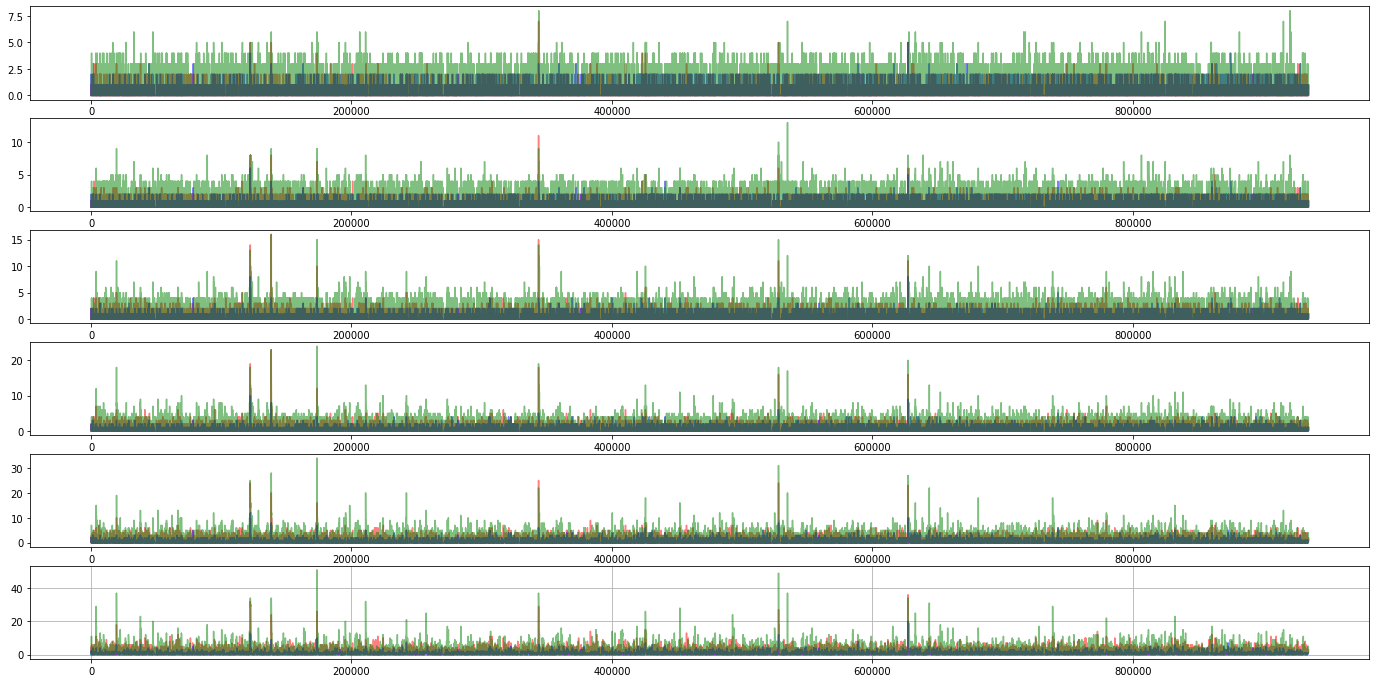

In [22]:
# population rate to various bin size
# bin_size = [0.005, 0.01, 0.02, 0.03, 0.05, 0.1]   # unit: second
bin_size = [5, 10, 20, 30, 50, 100]
fig, axs = plt.subplots(len(bin_size), 1, figsize=(24, 12))
for i in range(len(bin_size)): 
    bins_left, pr_left = population_rate(bin_size[i], st_left.values())
    bins_middle, pr_middle = population_rate(bin_size[i], st_middle.values())
    bins_right, pr_right = population_rate(bin_size[i], st_right.values())
    axs[i].plot(bins_left[:-1], pr_left, color='red', alpha=0.5)
    axs[i].plot(bins_middle[:-1], pr_middle, color='blue', alpha=0.5)
    axs[i].plot(bins_right[:-1], pr_right, color='green', alpha=0.5)
#     axs[i].set_xlim(342, 346)
plt.grid(True)    
plt.show()


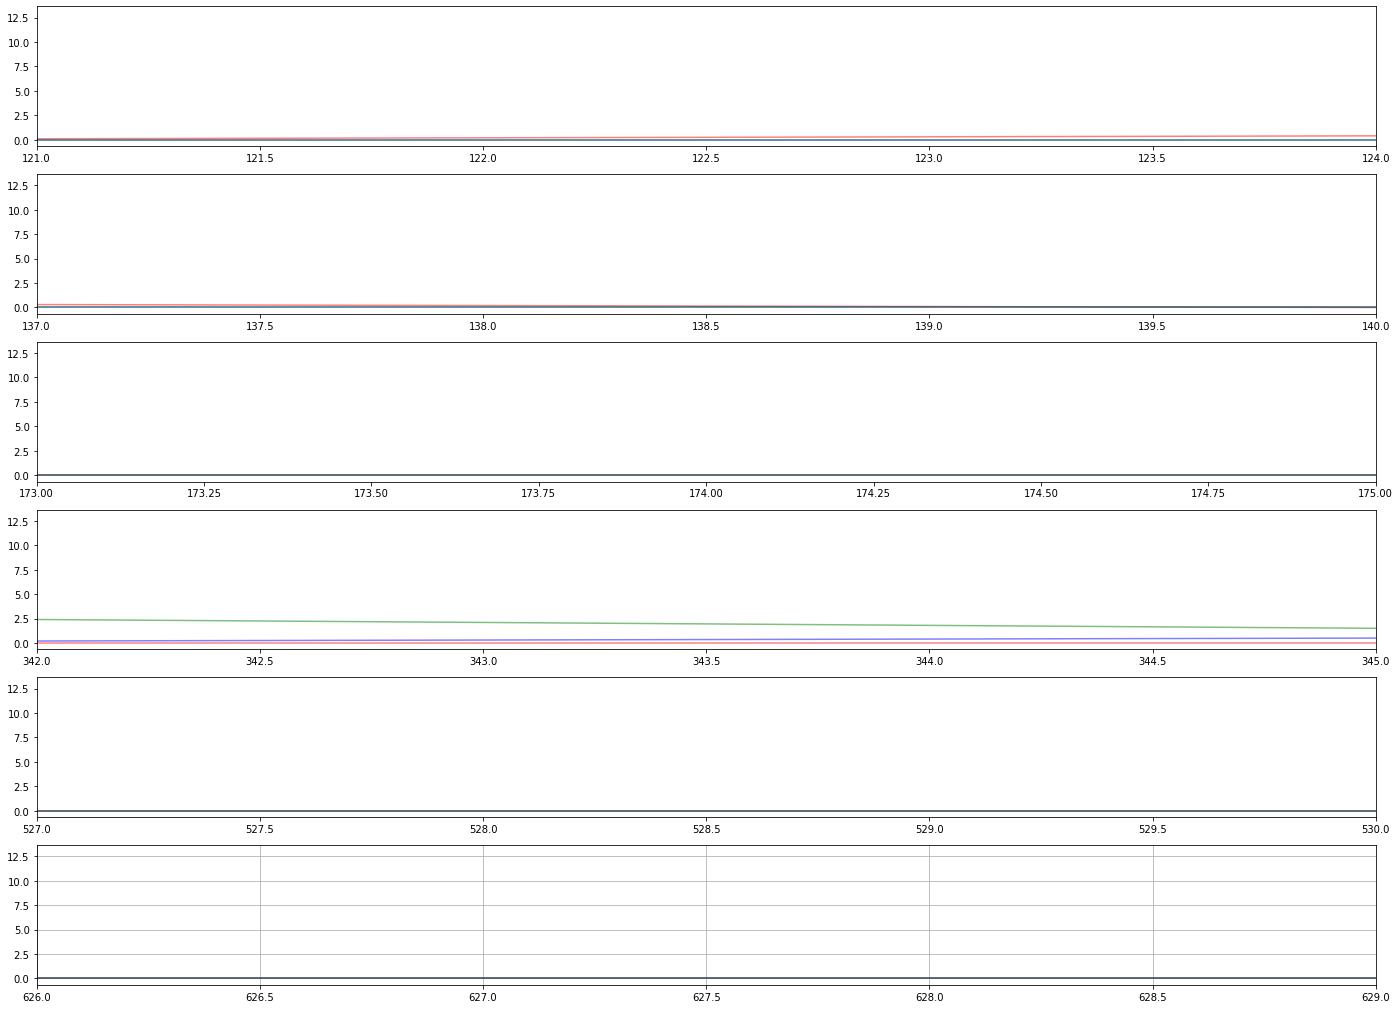

In [23]:
# bin_size = 0.01
bin_size = 10
fig, axs = plt.subplots(6, 1, figsize=(24, 18))
bins_left, pr_left = population_rate(bin_size, st_left.values())
bins_middle, pr_middle = population_rate(bin_size, st_middle.values())
bins_right, pr_right = population_rate(bin_size, st_right.values())

axs[0].plot(bins_left[:-1], pr_left, color='red', alpha=0.5)
axs[0].plot(bins_middle[:-1], pr_middle, color='blue', alpha=0.5)
axs[0].plot(bins_right[:-1], pr_right, color='green', alpha=0.5)
axs[0].set_xlim(121, 124)

axs[1].plot(bins_left[:-1], pr_left, color='red', alpha=0.5)
axs[1].plot(bins_middle[:-1], pr_middle, color='blue', alpha=0.5)
axs[1].plot(bins_right[:-1], pr_right, color='green', alpha=0.5)
axs[1].set_xlim(137, 140)

axs[2].plot(bins_left[:-1], pr_left, color='red', alpha=0.5)
axs[2].plot(bins_middle[:-1], pr_middle, color='blue', alpha=0.5)
axs[2].plot(bins_right[:-1], pr_right, color='green', alpha=0.5)
axs[2].set_xlim(173, 175)

axs[3].plot(bins_left[:-1], pr_left, color='red', alpha=0.5)
axs[3].plot(bins_middle[:-1], pr_middle, color='blue', alpha=0.5)
axs[3].plot(bins_right[:-1], pr_right, color='green', alpha=0.5)
axs[3].set_xlim(342, 345)

axs[4].plot(bins_left[:-1], pr_left, color='red', alpha=0.5)
axs[4].plot(bins_middle[:-1], pr_middle, color='blue', alpha=0.5)
axs[4].plot(bins_right[:-1], pr_right, color='green', alpha=0.5)
axs[4].set_xlim(527, 530)

axs[5].plot(bins_left[:-1], pr_left, color='red', alpha=0.5)
axs[5].plot(bins_middle[:-1], pr_middle, color='blue', alpha=0.5)
axs[5].plot(bins_right[:-1], pr_right, color='green', alpha=0.5)
axs[5].set_xlim(626, 629)
plt.grid(True)    
plt.show()

In [24]:
# 5 ms rolling window to find unitary events that more than N neurons fire together
prop = 3
# win_size = 0.005
win_size = 5
win_list, _ = population_rate(win_size, spike_times)
print(len(win_list))  # bins

dens_all = []
for st in spike_times:
    dens,_ = np.histogram(st, win_list)
    dens_all.append(dens)
print(len(dens_all))

# count the number of neurons in each bin
fire_num = np.count_nonzero(dens_all, axis=0)
print(fire_num[0:20], len(fire_num))
fire_win_ind = []
fire_wins = []
for i in range(len(fire_num)):
    if fire_num[i] > 5:    # to test with N neurons
        fire_win_ind.append(i)
        fire_wins.append(win_list[i: i+2])     # the windows that have spike times
print(len(fire_win_ind))
# print(fire_wins)

187021
66
[0 0 0 0 0 1 0 3 0 0 0 0 0 1 0 0 0 0 0 0] 187020
109


21
9
32


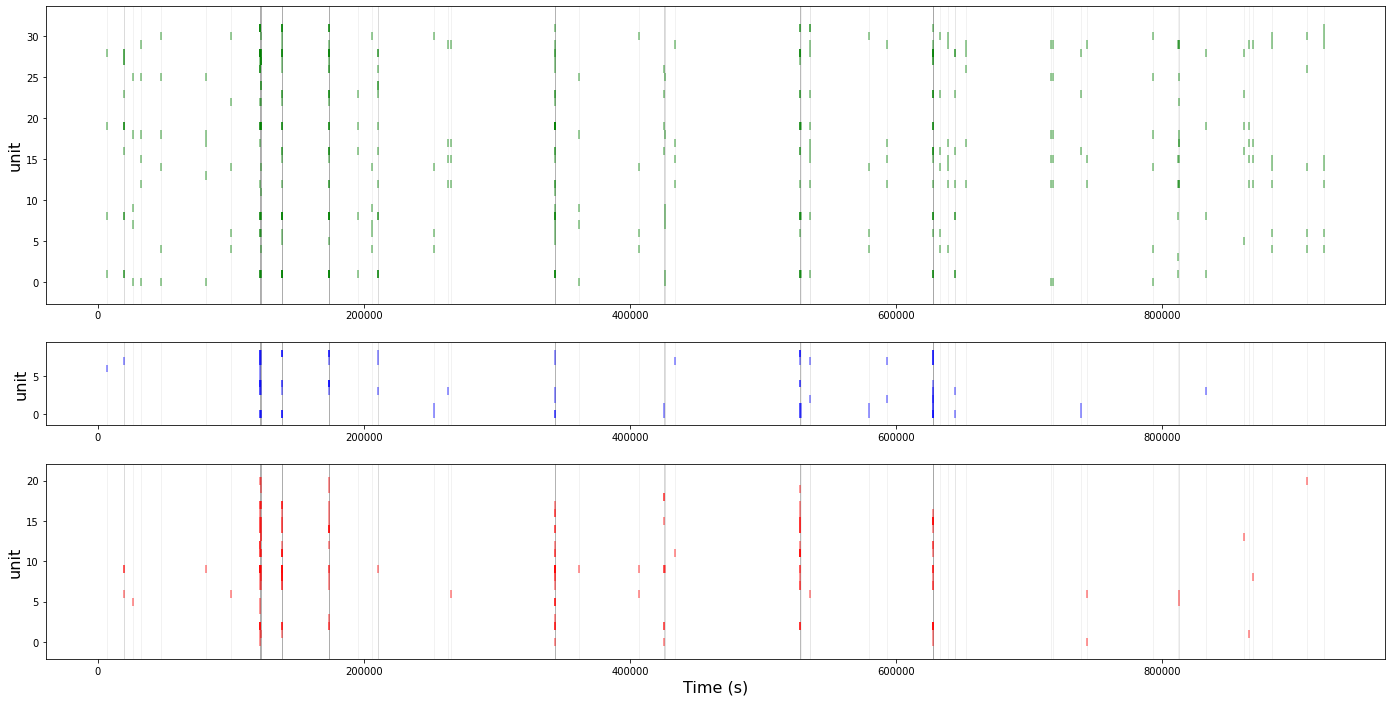

In [25]:
# highlight the spike times in fire_wins
unitary_parts = []
spike_times_parts = [st_left.values(), st_middle.values(), st_right.values()]
for part in spike_times_parts:
    unitary = []
    for st in part:
        win_times = []
        for win in fire_wins:
            ind = np.searchsorted(st, win, side='left')
            win_times += st[ind[0]:ind[1]]
        unitary.append(win_times)
    unitary_parts.append(unitary)
    print(len(unitary))
                            
fig, axs = plt.subplots(3, 1, figsize=(24, 12), gridspec_kw={'height_ratios': [len(st_right), len(st_middle), len(st_left)]})
color, linelengths, linewidth, alpha = ['green', 'blue', 'red'], 1, 2, 0.4
for i in range(2, -1, -1):
    axs[i].eventplot(unitary_parts[2-i], linelengths=linelengths, linewidth=linewidth, color=color[i], alpha=alpha)
    for j in range(len(fire_wins)):
        axs[i].axvspan(fire_wins[j][0], fire_wins[j][1], alpha=0.1, color='grey')
    axs[i].set_ylabel("unit", fontsize=16)
#     axs[i].set_xlim(-20, 950)
#     axs[i].set_xlim(343.6, 344)
#     axs[i].set_xlim(122.2, 122.6)
#     axs[i].set_xlim(100, 200)
axs[2].set_xlabel('Time (s)', fontsize=16)
plt.show()

In [26]:
# duration, frequency of the unitary events

In [27]:
# average spike times for participated neurons in every bin
# # plot a raster with x-axis the bins and y-axis the averaged spike times
# # print(fire_wins)
# unitary_mean_parts = []
# for part in unitary_parts:  # left, middle, right
# #     print(part)
#     unitary_st = sorted(list(itertools.chain.from_iterable(part)))
# #     print(unitary_st)
#     binned_mean = []
#     fire_wins_middle = []
#     for win in fire_wins:
# #         print(win)
#         ind = np.searchsorted(unitary_st, win, side='left')
# #         print(ind)
#         mean = np.mean(unitary_st[ind[0]: ind[1]])
# #         print(mean)
#         binned_mean.append(mean)
#         fire_wins_middle.append((win[1]+win[0])/2)
#     unitary_mean_parts.append(binned_mean)
# # print(fire_wins_middle)
# fig, axs = plt.subplots(1, 3, figsize=(24, 8))
# color = ['green', 'blue', 'red']
# for i in range(len(unitary_mean_parts)):
#     axs[i].scatter(fire_wins_middle, unitary_mean_parts[2-i], color=color[i], alpha=0.4)
# plt.show()

In [28]:
# # is there a neural trajectory, from left -> middle -> right
# dms_left,_ = np.histogram(sorted(list(itertools.chain.from_iterable(unitary_parts[0]))), win_list)
# dms_middle, _ = np.histogram(sorted(list(itertools.chain.from_iterable(unitary_parts[1]))), win_list) 
# dms_right, _ = np.histogram(sorted(list(itertools.chain.from_iterable(unitary_parts[2]))), win_list) 

# # plot in 3D
# # from mpl_toolkits.mplot3d import Axes3D

# fig = plt.figure(figsize=(12, 12))
# ax = fig.gca(projection='3d')

# ax.scatter(dms_left, dms_middle, dms_right, '-o', linewidth=0.5, alpha=1)
# plt.show()

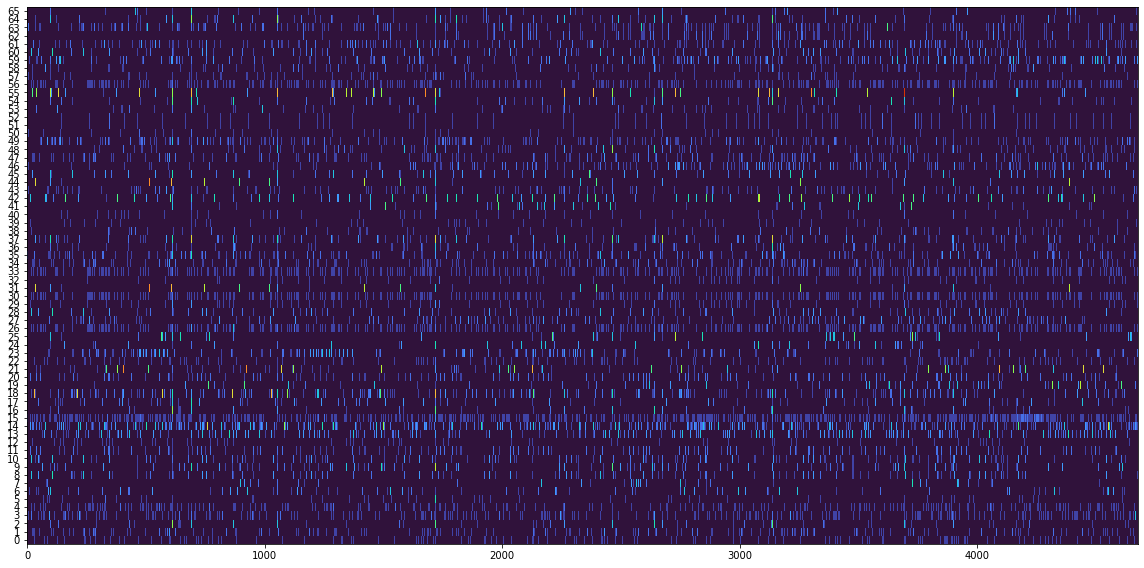

In [29]:
# firing heatmap
spike_times_sorted = sorted(list(itertools.chain.from_iterable(spike_times)))
bin_size = 200
bin_max = max(spike_times_sorted)
bin_num = int(bin_max//bin_size)+1
bins = np.linspace(0, bin_max, bin_num)
firing_rate = []
for st in spike_times:
    fr, _ = np.histogram(st, bins)
    firing_rate.append(list(fr))
# print(firing_rate[0])
fig, ax = plt.subplots(figsize=(16, 8))
im = ax.imshow(firing_rate, interpolation='nearest', aspect='auto', cmap = "turbo")
ax.set_yticks(np.arange(len(firing_rate)))
# plt.colorbar()
fig.tight_layout()
plt.gca().invert_yaxis()
plt.show()

In [30]:
# 1/isi as the instantanous firing rate
inst_fr = []
for st in spike_times:
    st_fr = []
    for i in range(len(st)-1):
        st_fr.append(1/(st[i+1]-st[i]))
    inst_fr.append(st_fr)

## PCA on high dimensional data -- each neuron is a dimension

In [31]:
bin_size = 0.1   # 100 ms
spike_times_sorted = sorted(list(itertools.chain.from_iterable(spike_times)))        
bin_max = max(spike_times_sorted)
bin_num = int(bin_max//bin_size)+1
bins = np.linspace(0, bin_max, bin_num)

In [ ]:
hdm_firing = []
for st in spike_times:
    dens,_ = np.histogram(st, bins)
    hdm_firing.append(dens)
print(len(hdm_firing), len(hdm_firing[0]))

In [ ]:
hdm_firing = np.asarray(hdm_firing).T
print(hdm_firing.shape)

In [ ]:
import sklearn.preprocessing as sklpre
import sklearn.decomposition as skldecom
scaler = sklpre.StandardScaler()
scaler.fit(hdm_firing)
hdm_firing_scaled = scaler.transform(hdm_firing)
print(len(hdm_firing_scaled), hdm_firing_scaled)

In [ ]:
pca = skldecom.PCA(n_components=hdm_firing_scaled.shape[1], random_state=4)
pca.fit(hdm_firing_scaled)
hdm_firing_pca = pca.transform(hdm_firing_scaled)
print("variance explained by all 66 principal components = ",
     sum(pca.explained_variance_ratio_*100))
print(pca.explained_variance_ratio_*100)

fig = plt.figure(1, figsize=(4, 3))
plt.clf()

# ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
# ax.set_position([0, 0, 0.95, 1])

# ax.scatter(hdm_firing_pca[:, 3], hdm_firing_pca[:, 4], hdm_firing_pca[:, 5], cmap=plt.cm.nipy_spectral, edgecolor="k")
# plt.show()

In [ ]:
pca_cumsum = np.cumsum(pca.explained_variance_ratio_*100)
plt.plot(pca_cumsum, "o-")
plt.xlabel('Number of components')
plt.ylabel("Explained variance (%)")
plt.grid(True)
plt.show()

## Neuronal trajectory

In [ ]:
# 100 ms bin
bin_size = 0.1   # 100 ms
spike_times_sorted = sorted(list(itertools.chain.from_iterable(spike_times)))        
bin_max = max(spike_times_sorted)
bin_num = int(bin_max//bin_size)+1
bins = np.linspace(0, bin_max, bin_num)

flatten_firing,_ = np.histogram(spike_times_sorted, bins)
print(type(flatten_firing), flatten_firing.shape)

# reshape to 1 s (1000 ms)
trj_1s = flatten_firing[:int(10/bin_size)].reshape(10, int(1/bin_size))
print(trj_1s)
xx = np.arange(int(1/bin_size))
fig, axs = plt.subplots(1, 1, figsize=(8, 6))  
for i in range(len(trj_1s)):
    axs.plot(xx, trj_1s[i])
plt.xlabel('Time (s)')
plt.ylabel("Firing rate")
plt.show()

## Spike templates on electrode map

In [ ]:
# neurons with sttc > 0.35
good_sttc_pair = []    # index to clusters_good
good_sttc = set()
for i in range(len(tilings)):
    for j in range(i+1, len(tilings)):
        if tilings[i][j] > 0.35:
            good_sttc_pair.append((i, j, tilings[i][j]))
            good_sttc.add(i); good_sttc.add(j)
good_sttc_pair.sort(key=lambda s: s[2], reverse=True)
print(good_sttc, len(good_sttc)) 
print(good_sttc_pair, len(good_sttc_pair))

In [ ]:
# read templates
# templates_good is a list of templates for each good cluster/electrode
print(list(clusters_good.keys()), len(list(clusters_good.keys())))
good_cluster_ids = list(clusters_good.keys())
chn_list = list(chn_map.keys())
spike_templates = np.load(folder_name + 'templates.npy')     # [num_id, tp_len, num_electrode]
tp_len = len(spike_templates[0])
print(spike_templates.shape, tp_len, spike_templates[0][0][20])
templates_good = {}    # {id: [tp_points]}
for s in good_sttc:
    g = good_cluster_ids[s]
    tpl = []
    for i in range(tp_len):
        tpl.append(spike_templates[g][i][chn_list.index(clusters_good[g])])
    templates_good[g] = tpl
    tpl = []
print(len(templates_good), templates_good[0])

In [ ]:
# templates for center electrode and neighbors, only for good sttc neurons
# create a nested dictinary
chn_list = list(chn_map.keys())
templates_neighbor = {}
for s in good_sttc:    # s is the index to good neurons
    g = good_cluster_ids[s]    # g is the good cluster id for good sttc neurons
    tpl_nb = {}           # templates with neighbor electrodes, tpl_nb = {electrode: [tp_points]}
    for c in chn_list:
        tpl = []
        for i in range(tp_len):
            tpl.append(spike_templates[g][i][chn_list.index(c)])   # spike_templates[id][tp_point][electrode]
            tpl_set = set(tpl)
            if len(tpl_set) > 1:
                tpl_nb[c] = tpl         
        tpl = []
    templates_neighbor[g] = tpl_nb     # {id: {electrode: [tp_points]}
print(len(templates_neighbor))

In [ ]:
# plot templates for electrodes in a range
# Good neurons, single template for the right organoid. Electrode coordinates range: 500 < x < 1500, 1100 < y < 1500
x_range = [2500, 3500]
y_range = [600, 1000]
elec_draw = []
temp_draw = []
for s in good_sttc:
    g = good_cluster_ids[s]
    temp = templates_good[g]
    elec_pos = chn_map[clusters_good[g]]     # clusters_good = {id: elec}   chn_map = {elec: elec_pos}
    if x_range[0] < elec_pos[0] < x_range[1] and y_range[0] < elec_pos[1] < y_range[1]:
#         print(elec_pos[0], elec_pos[1])
        elec_draw.append(elec_pos)
        temp_draw.append(temp)
        
# inset subplot scale factor
edge = 30
elec_draw = np.asarray(elec_draw)
x_min = min(elec_draw[:,0]) - edge
x_max = max(elec_draw[:,0]) + edge
y_min = min(elec_draw[:,1]) - edge
y_max = max(elec_draw[:,1]) + edge
x_diff = x_max - x_min
y_diff = y_max - y_min

# recording electrodes as a background 
# elec_map = np.asarray(list(chn_map.values()))
elec_map = list(chn_map.values())
elec_map_region = []
for e in elec_map:
    if x_range[0] < e[0] < x_range[1] and y_range[0] < e[1] < y_range[1]:
        elec_map_region.append(e)
elec_map_region = np.asarray(elec_map_region)

# plot figure
fig, axs = plt.subplots(figsize=(24, 12))
axs.scatter(elec_map_region[:,0], elec_map_region[:,1], s=1, color='grey')
axs.scatter(elec_draw[:,0], elec_draw[:,1])
for i in range(len(elec_draw)):   
    axin = axs.inset_axes([(elec_draw[i][0]-x_min)/(x_diff), (elec_draw[i][1]-y_min)/y_diff, 0.05, 0.05])
    axin.plot(temp_draw[i])
    axin.set_axis_off()
for sttc_idn in good_sttc_pair:
    st = sttc_idn[0]
    st_id = good_cluster_ids[st]
    en = sttc_idn[1]
    en_id = good_cluster_ids[en]
    st_elec_pos = chn_map[clusters_good[st_id]]
    en_elec_pos = chn_map[clusters_good[en_id]]
    if x_range[0] < st_elec_pos[0] < x_range[1] and y_range[0] < st_elec_pos[1] < y_range[1]:
        if x_range[0] < en_elec_pos[0] < x_range[1] and y_range[0] < en_elec_pos[1] < y_range[1]:
            plt.plot([st_elec_pos[0], en_elec_pos[0]], [st_elec_pos[1], en_elec_pos[1]], linewidth=10*sttc_idn[2], color='red', alpha=0.3)
for i in range(len(spike_times)):
    if x_range[0] < chn_pos[i][0] < x_range[1] and y_range[0] < chn_pos[i][1] < y_range[1]:
        plt.scatter(chn_pos[i][0], chn_pos[i][1], s=len(spike_times[i])/10, color='green')
axs.set_xlim(x_min, x_max)
axs.set_ylim(y_min, y_max)
# plt.gca().invert_yaxis()
plt.show()

In [ ]:
# raster for good sttc neurons
good_cluster_ids = list(clusters_good.keys())
sttc_st_left = []
sttc_st_right = []
y_ticklabel = []
for s in good_sttc:
    g = good_cluster_ids[s]
    elec_pos = chn_map[clusters_good[g]]
    if elec_pos[0] < 2000:
        sttc_st_left.append(spike_times_good[g])
    else:
        sttc_st_right.append(spike_times_good[g])
    y_ticklabel.append((g, clusters_good[g]))     # (id, chn)
#     y_ticklabel.append(s)

empty_list = []
for i in range(len(sttc_st_left)+1):
    empty_list.append([])
print(empty_list)
sttc_st_right = empty_list+sttc_st_right


fig, axs = plt.subplots(1, 1, figsize=(24, 6))
axs.eventplot(sttc_st_left, linelengths=1, linewidth=2, color='blue', alpha=0.4)
axs.eventplot(sttc_st_right, linelengths=1, linewidth=2, color='blueviolet', alpha=0.4)
# axs.set_xlim(340, 347)
# axs.set_yticks(list(range(len(sttc_spike_times))), y_ticklabel)
plt.show()
# pair them in the plot 

## Spike time delay distribution

In [ ]:
# Delay distribution sorted in sttc descending order
# algo 1: interpolate spike times (similar to 'searchsorted' function)
# However, searchsorted always return positve or negative latency, so it's the wrong way to find the latency
sttc_good_lat = []
for pair in range(len(good_sttc_pair)):
    train_1 = spike_times_good[good_cluster_ids[good_sttc_pair[pair][0]]]
    train_2 = spike_times_good[good_cluster_ids[good_sttc_pair[pair][1]]]
    label_1 = [0]*len(train_1)
    label_2 = [1]*len(train_2)
    train_inter = list(zip(label_1, train_1)) + list(zip(label_2, train_2))
    train_inter.sort(key=lambda a: a[1])

    lat = []
    i, diff, thr = 0, 0, 30   # 30 ms -- sttc bin size
    label = train_inter[0][0]
    while i < len(train_inter)-1:
        j = i+1
        if train_inter[i][0] != train_inter[j][0]:
            diff = train_inter[j][1] - train_inter[i][1]
            if diff > thr:    
                i += 1
            else:
                if train_inter[i][0] == label:
                    lat.append(diff)
                else:
                    lat.append(train_inter[i][1] - train_inter[j][1])
                i += 2
        else:
            i += 1
    print(len(lat), min(lat), max(lat), np.mean(lat), np.std(lat))   # ms
    sttc_good_lat.append(lat)
print(len(sttc_good_lat))

# plot latency distribution
num_bins = 10
fig, axs = plt.subplots(len(sttc_good_lat), 1, figsize=(12, 8*len(sttc_good_lat)))
for i in range(len(sttc_good_lat)):
    n, bins, patches = axs[i].hist(sttc_good_lat[i], bins=num_bins, rwidth=0.9, facecolor='g')
    axs[i].set_xlabel('latency (ms)', fontsize=16)   
#     axs[i].set_xlim([-20, 20])

plt.show()

In [ ]:
# reject high sttc's with standard deviation
# also merge the one that has high similarity? (auto curation)

# Tests

In [ ]:
spike_clusters = np.load(folder_name + 'spike_clusters.npy')
print(len(spike_clusters), spike_clusters[0:100])

In [ ]:
spike_templates = np.load(folder_name + 'spike_templates.npy')
print(spike_templates.shape, len(spike_templates), spike_templates[0:10])

In [ ]:
templates = np.load(folder_name + 'templates.npy')
print(templates.shape, len(templates[0]), templates[0][i][469])
amp_test = []
for i in range(len(templates[0])):
    amp_test.append(templates[0][i][469])

In [ ]:
%matplotlib inline
fig = plt.figure()
x = list(range(len(amp_test)))
# print(x, amp_test)
plt.plot(amp_test)
plt.show()

In [ ]:
template_ind = np.load(folder_name + 'templates_ind.npy')
template_ind_example = template_ind[2]
print(template_ind.shape, len(template_ind[0]), template_ind_example)

In [ ]:
channel_map = np.load('Trace_20220503_12_25_42_chip11350.raw/Trace_20220503_12_25_42_chip11350.raw.GUI/channel_map.npy')
print(shape(channel_map))
for i in template_ind_example:
    if i != -1:
        print(channel_map[i])

In [ ]:
amplitudes = np.load('Trace_20220503_12_25_42_chip11350.raw/Trace_20220503_12_25_42_chip11350.raw.GUI/amplitudes.npy')
print(shape(amplitudes), amplitudes)

In [ ]:
dif = set(spike_clusters).difference(spike_templates)
print(dif)
dif = set(spike_templates).difference(spike_clusters)
print(dif)
id_num = list(spike_clusters).count(91)
print(id_num)

In [ ]:
recording = 'Trace_20220501_14_26_56_chip11350.raw'
date = "".join([i for i in recording if i.isnumeric()][0: 14])    # the first 14 digits are recording time label
probefile_name = 'probefile_' + date + ".prb"
print(probefile_name)

In [ ]:
import ast
with open(probefile_name) as pf:
    lines = pf.read()
geometry = ast.literal_eval(lines.split('geometry', 1)[1][3:-2])
print(type(geometry), len(geometry))

In [ ]:
import ast
with open(probefile_name) as pf:
    lines = pf.read()
geometry = ast.literal_eval(lines.split('geometry', 1)[1][3:-2])
print(type(geometry))
print(type(geometry) is dict)

In [ ]:
fig, ax1 = plt.subplots()
ax1.scatter(range(8, 21), range(8, 21))
# ax1.scatter(2,3)
# axin1 = ax1.inset_axes([5, 6, 3, 3], transform=ax1.transData)
axin2 = ax1.inset_axes([.2, .7, .3, .3])
axin2.plot(range(2))
ax1.grid(True)

In [ ]:
np.searchsorted([1,2,3,4,5], [1,3], side='right')

In [ ]:
import pylab
import seaborn as sns
import statsmodels.api as sm
sns.set_style("darkgrid")
pylab.rc("figure", figsize=(16, 8))
pylab.rc("font", size=14)
# Seed for consistency
np.random.seed(1)
# Generate data looking like cosine
x = np.random.uniform(0, 4 * np.pi, size=20000)
y = np.cos(x) + np.random.random(size=len(x))

# Compute a lowess smoothing of the data
smoothed = sm.nonparametric.lowess(exog=x, endog=y, frac=0.2)# Plot the fit line
fig, ax = pylab.subplots()

ax.scatter(x, y)
ax.plot(smoothed[:, 0], smoothed[:, 1], c="k")
pylab.autoscale(enable=True, axis="x", tight=True)

In [ ]:
print(np.arange(0, 101*20000, 101), len(np.arange(0, 101*20000, 101)))